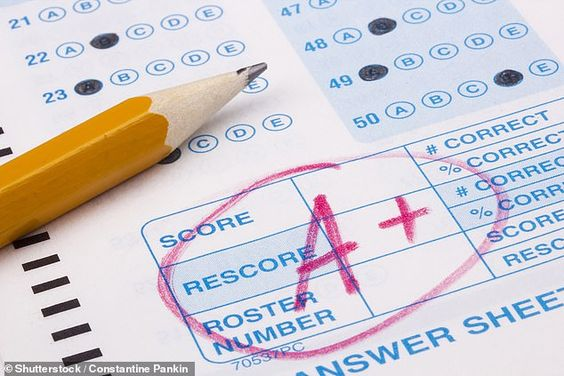

## Prediction Using Supervised Machine Learning 
> Predicting Student Grades based on Study Hours

Author: Nesrin Brahim

Date: 02-06-2023

---

### Introduction

Welcome to this notebook, where we will explore the development of a machine learning model that predicts the percentage (grade) of a student based on their hours of study. This project is part of an internship with the Sparks Foundation, aimed at gaining practical experience in the field of data science and machine learning.


The goal of this project is to provide an accurate prediction of student grades using a simple linear regression model. We will explore the relationship between the number of study hours and the corresponding percentage achieved by students. This information can be valuable for educators, allowing them to identify students who may need additional support or intervention based on their study patterns.

By the end of this notebook, you will have a clear understanding of how to approach a regression problem, implement a machine learning model, and evaluate its performance. Let's get started!


# **1. Import necessary librairies**

To build the prediction model, we need a couple librairies. I the next cell I will import the python librairies we need for this code with mentioning why is each one needed.

In [1]:
import pandas as pd              #Data manipulation and analysis library
import numpy as np               #Linear Algebra
import matplotlib.pyplot as plt  #Plotting and data visualization
import seaborn as sns            #Statistical data visualization
print('Librairies imported succesfully')

Librairies imported succesfully


I used the data given to us by The Sparks Foundation for this task and put it in a CSV file and stored i in my Google Drive. To be able to use that data, mounting drive to colab is required.

# **2. Import data** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
print('Drive mounted successfully')

Mounted at /content/drive
Drive mounted successfully


Then simply use the Pandas function  **'read_csv("file_path")'**  to read the dataset.

In [3]:
data=pd.read_csv("/content/drive/MyDrive/TSF/#1/dataset/studentGrade.csv")
print('Dataset imported successfully')

Dataset imported successfully


Or simply use the same function with the url of the data given by the TSF task: 

In [4]:
url="http://bit.ly/w-data"
data_url=pd.read_csv(url)

In [5]:
data.equals(data_url)

True

# **3. Get info about the data**

- The function *'info()'* gives us a summary of the Dataset's structure and information about its columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- The function *'head()'* displays the first 5 rows of the dataset.
 if added a parameter n, *'head(n)'* displays the first n rows.

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- The function *'shape'* gives the dimension of the dataset (rows,columns).

In [8]:
data.shape

(25, 2)

- The function *'describe()'* generates descriptive statistics of a DataFrame (count, mean, min, max, quatiles...).

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **4. Check for null values, duplicates and outliers**
In order to get accurate and precise predictions, it's a wise step to check in the dataset for null values, duplicates or outliers and correct them.

In our case: 
- There is no null values.
- There is no duplicates.
- There is no outliers.

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
data.duplicated().sum()

0

<Axes: >

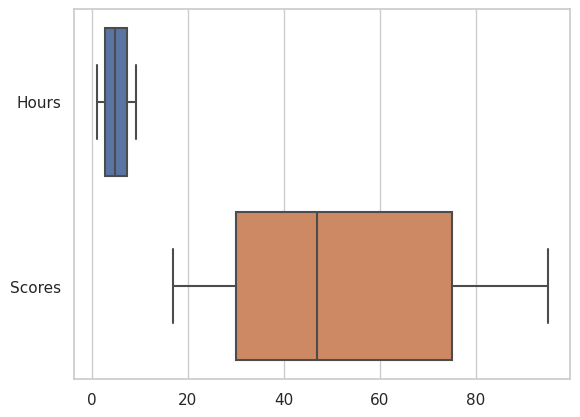

In [12]:
sns.set(style='whitegrid') 
sns.boxplot(data=data, orient='h')

# **5. Visualize the data**
To visualize the data, Matplotlib offers a variety of tools.

The easiest one, used to display a 2D presentation of the data is plot:

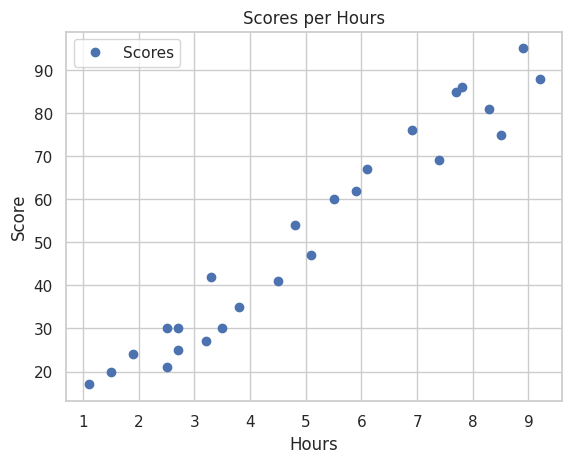

In [13]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Scores per Hours')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

--> It is visually noticible that the more hours a student spends studying, the higher the percentage he acquires.

So, we can conclude that there is a positive linear relation between the hours studied and percentage scored.

# **5. Prepare the data for training**
Now that data is all good and ready to be used, and as we are going to use supervised learning, we have to seperate **the features** and **the target**.

To do so, we can use the function *'iloc'* to slice the dataframe.

In [14]:
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

Now we have to split the data into training and testing data using the function **train_test_split**.

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0) 

# **6. Training**
Now we import the **sklearn** librairy that has the **linear regression** algorithm that is going to help us make our model.


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
model.score(x_train,y_train)

0.9515510725211552

Linear regression's result is a line that can predict the scores of new students based on their hours of study.

We can recuperate its coefficient and constant: 

In [18]:
coef= model.coef_
const= model.intercept_
print("The equation of the regression's line: ")
print("score = ",float(coef)," * hours + ",const)

The equation of the regression's line: 
score =  9.91065648064224  * hours +  2.018160041434662


We can visualize the line:

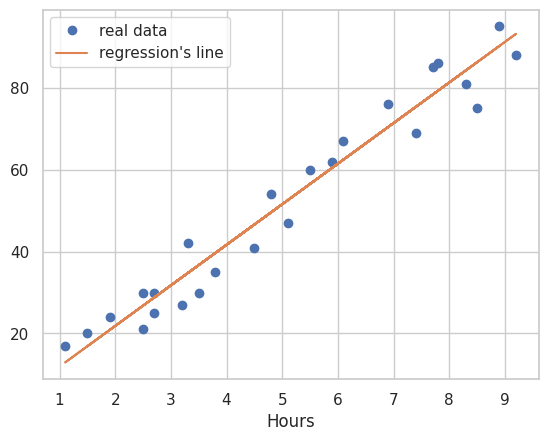

In [19]:
line = coef * x + const
data.plot(x='Hours', y='Scores', style='o',label="real data") 
plt.plot(x,line,label="regression's line")

plt.legend()
plt.show()


In [20]:
coef= model.coef_
const= model.intercept_
def score (hours):
  return int(coef * hours + const)

for the test required: 

for 9.29 hrs of study

In [21]:
score(9.25)

93

# **7. Evaluation**
To evaluate the model, we can use a variety of metrics 
- MSE
- RMSE
- MAE
- R^2
- Accuracy....

But first we have to make the predictions, using the test data.


In [22]:
y_pred=model.predict(x_test)

We can compare the actual data to predicted values:

In [23]:
df=pd.DataFrame({'Reel':y_test,'Predicted':y_pred})
df

,Reel,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('r2_score',r2_score(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('accuracy',model.score(x_test,y_test))


r2_score 0.9454906892105354
mean_squared_error 21.598769307217456
mean_absolute_error 4.183859899002982
accuracy 0.9454906892105354
